**Chapter 10 – Building Neural Networks with PyTorch**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/09_neural_nets_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/09_neural_nets_with_pytorch.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.5.2:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.5.2")

If using Colab, a few libraries are not pre-installed so we must install them manually:

In [3]:
if "google.colab" in sys.modules:
    %pip install -q optuna torchmetrics

And we also need PyTorch ≥ 2.4.0:

In [4]:
import torch

assert Version(torch.__version__) >= Version("2.4.0")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PyTorch Fundamentals
## PyTorch Tensors

In [6]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [7]:
X.shape

torch.Size([2, 3])

In [8]:
X.dtype

torch.float32

In [9]:
X[0, 1]

tensor(4.)

In [10]:
X[:, 1]

tensor([4., 3.])

In [11]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [12]:
X.exp()

tensor([[   2.7183,   54.5982, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [13]:
X.mean()

tensor(3.8333)

In [14]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [15]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [16]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [17]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [18]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [19]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [20]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

In [21]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [22]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

PyTorch tensors really resemble NumPy arrays. In fact, they have over 200 common functions!

In [23]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## Hardware Acceleration

In [24]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'mps'

In [25]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='mps', index=0)

In [26]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [27]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='mps:0')

In [28]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

2.33 ms ± 65.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
196 μs ± 2.34 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Autograd

Consider a simple function, $f(x) = x^2$.
Calculus tells us that the derivative of this function is $f'(x)=2x$. Let's evaluate $f(5)$ and the derivative $f'(5)$ using autograd. We expect to find $f(5)=5^2=25$ and $f'(5)=2*5=10$. Let's see!

In [29]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [30]:
f.backward()
x.grad

tensor(10.)

In [31]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [32]:
x

tensor(4., requires_grad=True)

Alternatively, we could have used this code for the gradient descent step (but using `no_grad()` is more common for this):

In [33]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

In [34]:
x.grad.zero_()

tensor(0.)

Let's put everything together to get our training loop:

In [35]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

The variable `x` gets pushed towards 0, since that's the value that minimizes $f(x) = x^2$:

In [36]:
x

tensor(1.0185e-09, requires_grad=True)

# Implementing Linear Regression
## Linear Regression Using Tensors & Autograd

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [38]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

PyTorch expects the targets to have one row per sample, so let's reshape the targets to be column vectors:

In [39]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [40]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

**Note**: in the next section, we will build an almost identical model using PyTorch's high-level API. Its results will be slightly different because it will use a different parameter initialization method: it will use a uniform random distribution from $-\frac{1}{2\sqrt 2}$ to $+\frac{1}{2\sqrt 2}$ to initialize both the weights and the bias term. If you want to get exactly the same result here as in the next section, you can uncomment and run the initialization code in the following cell, instead of the code in the previous cell:

In [41]:
# torch.manual_seed(42)
# n_features = X_train.shape[1]  # there are 8 input features
# r = 2 ** -1.5  # this is equal to 1 / 2√2
# w = torch.empty(n_features, 1).uniform_(-r, r)
# b = torch.empty(1).uniform_(-r, r)
# w.requires_grad_(True)
# b.requires_grad_(True)

In [42]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158458709716797
Epoch 2/20, Loss: 4.879374027252197
Epoch 3/20, Loss: 2.255225896835327
Epoch 4/20, Loss: 1.3307636976242065
Epoch 5/20, Loss: 0.9680691957473755
Epoch 6/20, Loss: 0.8142675757408142
Epoch 7/20, Loss: 0.741704523563385
Epoch 8/20, Loss: 0.7020700573921204
Epoch 9/20, Loss: 0.6765917539596558
Epoch 10/20, Loss: 0.6577964425086975
Epoch 11/20, Loss: 0.6426150798797607
Epoch 12/20, Loss: 0.6297222971916199
Epoch 13/20, Loss: 0.6184941530227661
Epoch 14/20, Loss: 0.6085968017578125
Epoch 15/20, Loss: 0.5998216271400452
Epoch 16/20, Loss: 0.5920186638832092
Epoch 17/20, Loss: 0.5850691199302673
Epoch 18/20, Loss: 0.578873336315155
Epoch 19/20, Loss: 0.5733453631401062
Epoch 20/20, Loss: 0.5684100389480591


In [43]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [44]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's High-Level API

In [45]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

In [46]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [47]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [48]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [49]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [51]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [52]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.337850093841553
Epoch 2/20, Loss: 0.7802939414978027
Epoch 3/20, Loss: 0.6253842115402222
Epoch 4/20, Loss: 0.6060435175895691
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.587356686592102
Epoch 7/20, Loss: 0.5802990198135376
Epoch 8/20, Loss: 0.5741382837295532
Epoch 9/20, Loss: 0.5687101483345032
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596511363983154
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525194406509399
Epoch 14/20, Loss: 0.5495392084121704
Epoch 15/20, Loss: 0.5468899607658386
Epoch 16/20, Loss: 0.5445339679718018
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405715703964233
Epoch 19/20, Loss: 0.5389097332954407
Epoch 20/20, Loss: 0.5374288558959961


In [53]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Implementing a Regression MLP

In [54]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [55]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523128509521484
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225848436355591
Epoch 7/20, Loss: 0.6893726587295532
Epoch 8/20, Loss: 0.6669033169746399
Epoch 9/20, Loss: 0.6507739424705505
Epoch 10/20, Loss: 0.6383934020996094
Epoch 11/20, Loss: 0.6281994581222534
Epoch 12/20, Loss: 0.6193398833274841
Epoch 13/20, Loss: 0.6113173365592957
Epoch 14/20, Loss: 0.6038705110549927
Epoch 15/20, Loss: 0.5968307852745056
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.5836467742919922
Epoch 18/20, Loss: 0.5774063467979431
Epoch 19/20, Loss: 0.5713555216789246
Epoch 20/20, Loss: 0.565444827079773


# Implementing Mini-Batch Gradient Descent using DataLoaders

In [56]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [57]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [58]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [59]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# Model Evaluation

In [60]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

In [61]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4193, device='mps:0')

In [62]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5732, device='mps:0')

In [63]:
valid_mse.sqrt()

tensor(0.6476, device='mps:0')

In [64]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6476, device='mps:0')

In [65]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [66]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6477, device='mps:0')

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5846, valid metric: 0.6043
Epoch 11/20, train loss: 0.3401, train metric: 0.5831, valid metric: 0.5882
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5872
Epoch 14/20, train lo

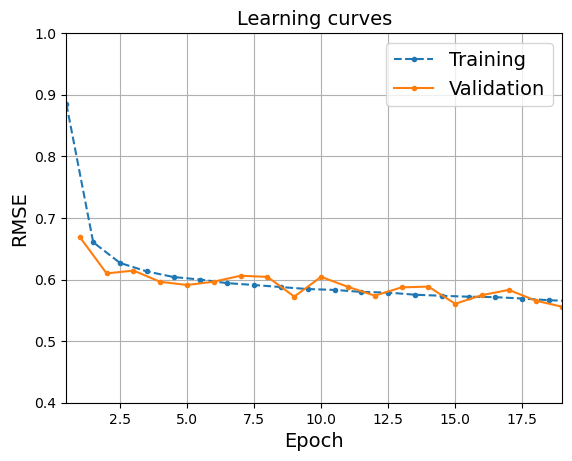

In [67]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric 
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

# Building Nonsequential Models Using Custom Modules

In [68]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [69]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

In [70]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

In [71]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5]
        X_deep = X[:, 2:]
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [72]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [73]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## Building Models with Multiple Inputs

In [74]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [75]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

In [76]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8335, train metric: 0.9131, valid metric: 0.6957
Epoch 2/20, train loss: 0.4736, train metric: 0.6882, valid metric: 0.6463
Epoch 3/20, train loss: 0.4447, train metric: 0.6669, valid metric: 0.6364
Epoch 4/20, train loss: 0.4251, train metric: 0.6520, valid metric: 0.6326
Epoch 5/20, train loss: 0.4157, train metric: 0.6447, valid metric: 0.6281
Epoch 6/20, train loss: 0.4093, train metric: 0.6397, valid metric: 0.6150
Epoch 7/20, train loss: 0.4023, train metric: 0.6343, valid metric: 0.6201
Epoch 8/20, train loss: 0.3971, train metric: 0.6301, valid metric: 0.6039
Epoch 9/20, train loss: 0.3906, train metric: 0.6250, valid metric: 0.6031
Epoch 10/20, train loss: 0.3855, train metric: 0.6209, valid metric: 0.5955
Epoch 11/20, train loss: 0.3800, train metric: 0.6164, valid metric: 0.5980
Epoch 12/20, train loss: 0.3738, train metric: 0.6114, valid metric: 0.5875
Epoch 13/20, train loss: 0.3690, train metric: 0.6074, valid metric: 0.5870
Epoch 14/20, train lo

In [77]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

In [78]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [79]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8335, train metric: 0.9131, valid metric: 0.6957
Epoch 2/20, train loss: 0.4736, train metric: 0.6882, valid metric: 0.6463
Epoch 3/20, train loss: 0.4447, train metric: 0.6669, valid metric: 0.6364
Epoch 4/20, train loss: 0.4251, train metric: 0.6520, valid metric: 0.6326
Epoch 5/20, train loss: 0.4157, train metric: 0.6447, valid metric: 0.6281
Epoch 6/20, train loss: 0.4093, train metric: 0.6397, valid metric: 0.6150
Epoch 7/20, train loss: 0.4023, train metric: 0.6343, valid metric: 0.6201
Epoch 8/20, train loss: 0.3971, train metric: 0.6301, valid metric: 0.6039
Epoch 9/20, train loss: 0.3906, train metric: 0.6250, valid metric: 0.6031
Epoch 10/20, train loss: 0.3855, train metric: 0.6209, valid metric: 0.5955
Epoch 11/20, train loss: 0.3800, train metric: 0.6164, valid metric: 0.5980
Epoch 12/20, train loss: 0.3738, train metric: 0.6114, valid metric: 0.5875
Epoch 13/20, train loss: 0.3690, train metric: 0.6074, valid metric: 0.5870
Epoch 14/20, train lo

## Building Models with Multiple Outputs

In [80]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

In [81]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0641, train metric: 0.9477, valid metric: 0.7070
Epoch 2/20, train loss: 0.5708, train metric: 0.6868, valid metric: 0.6428
Epoch 3/20, train loss: 0.5067, train metric: 0.6641, valid metric: 0.6354
Epoch 4/20, train loss: 0.4786, train metric: 0.6577, valid metric: 0.6367
Epoch 5/20, train loss: 0.4548, train metric: 0.6461, valid metric: 0.6372
Epoch 6/20, train loss: 0.4441, train metric: 0.6415, valid metric: 0.6202
Epoch 7/20, train loss: 0.4338, train metric: 0.6356, valid metric: 0.6157
Epoch 8/20, train loss: 0.4255, train metric: 0.6309, valid metric: 0.6130
Epoch 9/20, train loss: 0.4186, train metric: 0.6269, valid metric: 0.5995
Epoch 10/20, train loss: 0.4107, train metric: 0.6217, valid metric: 0.6067
Epoch 11/20, train loss: 0.4055, train metric: 0.6190, valid metric: 0.5910
Epoch 12/20, train loss: 0.3965, train metric: 0.6126, valid metric: 0.5986
Epoch 13/20, train loss: 0.3885, train metric: 0.6065, valid metric: 0.5810
Epoch 14/20, train lo

# Building an Image Classifier with PyTorch

## Using TorchVision to Load the Dataset

In [82]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

In [83]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Each entry is a tuple (image, target):

In [84]:
X_sample, y_sample = train_data[0]

Each image has a shape \[channels, rows, columns\]. Grayscale images like in Fashion MNIST have a single channel (while RGB images have 3, and other types of images, such as satellite images, may have many more). Fashion images are grayscale and 28x28 pixels:

In [85]:
X_sample.shape

torch.Size([1, 28, 28])

In [86]:
X_sample.dtype

torch.float32

In [87]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

## Building the Classifier

In [88]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                        n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

In [89]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
           n_epochs)

Epoch 1/20, train loss: 0.6060, train metric: 0.7816, valid metric: 0.8418
Epoch 2/20, train loss: 0.4062, train metric: 0.8495, valid metric: 0.8382
Epoch 3/20, train loss: 0.3631, train metric: 0.8655, valid metric: 0.8512
Epoch 4/20, train loss: 0.3351, train metric: 0.8770, valid metric: 0.8668
Epoch 5/20, train loss: 0.3147, train metric: 0.8835, valid metric: 0.8772
Epoch 6/20, train loss: 0.2985, train metric: 0.8876, valid metric: 0.8662
Epoch 7/20, train loss: 0.2848, train metric: 0.8933, valid metric: 0.8698
Epoch 8/20, train loss: 0.2738, train metric: 0.8972, valid metric: 0.8742
Epoch 9/20, train loss: 0.2625, train metric: 0.9022, valid metric: 0.8768
Epoch 10/20, train loss: 0.2520, train metric: 0.9049, valid metric: 0.8750
Epoch 11/20, train loss: 0.2451, train metric: 0.9080, valid metric: 0.8842
Epoch 12/20, train loss: 0.2355, train metric: 0.9111, valid metric: 0.8890
Epoch 13/20, train loss: 0.2284, train metric: 0.9133, valid metric: 0.8852
Epoch 14/20, train lo

In [90]:
model.eval()
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)  # index of the largest logit
y_pred

tensor([7, 4, 2], device='mps:0')

In [91]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sneaker', 'Coat', 'Pullover']

Let's check whether the model made the correct predictions:

In [92]:
y_new[:3]

tensor([7, 4, 2])

All correct! 😃

In [93]:
import torch.nn.functional as F
y_proba = F.softmax(y_pred_logits, dim=1)
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.cpu().round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0020, 0.0000, 0.9570, 0.0000,
         0.0400],
        [0.0000, 0.0000, 0.0030, 0.0000, 0.9970, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0010, 0.0000, 0.6700, 0.0010, 0.1440, 0.0000, 0.1820, 0.0000, 0.0010,
         0.0000]])

In [94]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
if device == "mps":
    y_top4_probas = y_top4_probas.cpu()
y_top4_probas.round(decimals=3)

tensor([[0.9570, 0.0400, 0.0020, 0.0000],
        [0.9970, 0.0030, 0.0000, 0.0000],
        [0.6720, 0.1830, 0.1440, 0.0010]])

In [95]:
y_top4_indices

tensor([[7, 9, 5, 8],
        [4, 2, 6, 3],
        [2, 6, 4, 0]], device='mps:0')

In [96]:
sum([param.numel() for param in model.parameters()])

266610

# Hyperparameter Tuning using Optuna

In [97]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [98]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-01-14 16:41:23,757] A new study created in memory with name: no-name-9067ff97-f870-417d-bc4a-62a7ed857cd9


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1862
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4556
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5560
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6467, valid metric: 0.6424


[I 2025-01-14 16:44:59,258] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6228, valid metric: 0.7336
Epoch 2/10, train loss: 0.6108, train metric: 0.7842, valid metric: 0.7994
Epoch 3/10, train loss: 0.5202, train metric: 0.8169, valid metric: 0.8096
Epoch 4/10, train loss: 0.4810, train metric: 0.8301, valid metric: 0.8312
Epoch 5/10, train loss: 0.4557, train metric: 0.8405, valid metric: 0.8350
Epoch 6/10, train loss: 0.4388, train metric: 0.8459, valid metric: 0.8440
Epoch 7/10, train loss: 0.4240, train metric: 0.8514, valid metric: 0.8412
Epoch 8/10, train loss: 0.4123, train metric: 0.8564, valid metric: 0.8510
Epoch 9/10, train loss: 0.3998, train metric: 0.8599, valid metric: 0.8530


[I 2025-01-14 16:48:43,793] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3896, train metric: 0.8639, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2025-01-14 16:52:29,166] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2025-01-14 16:56:10,153] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7904
Epoch 6/10, train loss: 0.5686, train metric: 0.8053, valid metric: 0.8050
Epoch 7/10, train loss: 0.5385, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8216
Epoch 9/10, train loss: 0.4988, train metric: 0.8281, valid metric: 0.8220


[I 2025-01-14 16:59:52,557] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


In [99]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [100]:
study.best_value

0.8547999858856201

In [101]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

In [102]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [103]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [104]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2025-01-14 16:59:52,594] A new study created in memory with name: no-name-f7bc3c53-41e1-42fa-ab3f-0e15ba9f3094


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1862
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4556
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5560
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6467, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6620
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2025-01-14 17:07:00,571] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7332
Epoch 1/1, train loss: 0.6133, train metric: 0.7864, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8136
Epoch 1/1, train loss: 0.4783, train metric: 0.8310, valid metric: 0.8232
Epoch 1/1, train loss: 0.4533, train metric: 0.8401, valid metric: 0.8024
Epoch 1/1, train loss: 0.4357, train metric: 0.8465, valid metric: 0.8448
Epoch 1/1, train loss: 0.4210, train metric: 0.8510, valid metric: 0.8280
Epoch 1/1, train loss: 0.4083, train metric: 0.8562, valid metric: 0.8400
Epoch 1/1, train loss: 0.3982, train metric: 0.8605, valid metric: 0.8528
Epoch 1/1, train loss: 0.3882, train metric: 0.8638, valid metric: 0.8584
Epoch 1/1, train loss: 0.3782, train metric: 0.8662, valid metric: 0.8544
Epoch 1/1, train loss: 0.3698, train metric: 0.8697, valid metric: 0.8568
Epoch 1/1, train loss: 0.3630, train m

[I 2025-01-14 18:34:58,552] Trial 17 finished with value: 0.8863999843597412 and parameters: {'learning_rate': 0.09698333459975128, 'n_hidden': 144}. Best is trial 16 with value: 0.8876000046730042.


Epoch 1/1, train loss: 0.1926, train metric: 0.9275, valid metric: 0.8782


[I 2025-01-14 18:35:20,999] Trial 18 pruned. 


Epoch 1/1, train loss: 1.8006, train metric: 0.4596, valid metric: 0.6052
Epoch 1/1, train loss: 0.7267, train metric: 0.7428, valid metric: 0.8252
Epoch 1/1, train loss: 0.4577, train metric: 0.8354, valid metric: 0.8460
Epoch 1/1, train loss: 0.4045, train metric: 0.8533, valid metric: 0.8550
Epoch 1/1, train loss: 0.3741, train metric: 0.8649, valid metric: 0.8484
Epoch 1/1, train loss: 0.3520, train metric: 0.8707, valid metric: 0.8610
Epoch 1/1, train loss: 0.3351, train metric: 0.8779, valid metric: 0.8748
Epoch 1/1, train loss: 0.3189, train metric: 0.8824, valid metric: 0.8710
Epoch 1/1, train loss: 0.3072, train metric: 0.8864, valid metric: 0.8710
Epoch 1/1, train loss: 0.2954, train metric: 0.8899, valid metric: 0.8752
Epoch 1/1, train loss: 0.2852, train metric: 0.8950, valid metric: 0.8802
Epoch 1/1, train loss: 0.2765, train metric: 0.8964, valid metric: 0.8804
Epoch 1/1, train loss: 0.2692, train metric: 0.8989, valid metric: 0.8770
Epoch 1/1, train loss: 0.2602, train m

[I 2025-01-14 18:42:57,800] Trial 19 finished with value: 0.8907999992370605 and parameters: {'learning_rate': 0.03509224713892104, 'n_hidden': 235}. Best is trial 19 with value: 0.8907999992370605.


Epoch 1/1, train loss: 0.2150, train metric: 0.9199, valid metric: 0.8864


In [105]:
study.best_value

0.8907999992370605

In [106]:
study.best_params

{'learning_rate': 0.03509224713892104, 'n_hidden': 235}

# Saving and Loading a PyTorch Model

In [107]:
torch.save(model, "my_fashion_mnist.pt")

In [108]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)

In [109]:
loaded_model.eval()
y_pred_logits = loaded_model(X_new)

In [110]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [111]:
type(model.state_dict())

collections.OrderedDict

In [112]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

<All keys matched successfully>

In [113]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [114]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# Compiling and Optimizing a PyTorch Model

In [115]:
torchscript_model = torch.jit.trace(model, X_new)

In [116]:
torchscript_model = torch.jit.script(model)

In [117]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [118]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [119]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [120]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[-6.8625,  1.7672, -3.0974, -2.2067, -3.1644,  0.7036, -5.0993, 13.9961,
         -3.2647,  7.7627],
        [-2.0537, -0.0509,  9.4781,  0.3942, 14.8989, -9.3567,  5.8201, -8.3479,
         -4.5794, -6.9351],
        [-1.5363, -4.3251,  8.1746, -0.5483,  3.9881, -2.2415,  5.3069, -2.3923,
         -2.6241, -3.5251]], device='mps:0')

In [121]:
compiled_model = torch.compile(model)

In [122]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

# Exercise solutions

**Work in progress**

If you would like to contribute a solution for an exercise, please submit a Pull Request, that would be greatly appreciated. Please aim for simple & flat code with as little boilerplate as possible: optimize for readability rather than efficiency.